17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
157/157 [==============================] - 55s 325ms/step - loss: 0.4977 - accuracy: 0.7526 - val_loss: 0.3297 - val_accuracy: 0.8678
Epoch 2/5
157/157 [==============================] - 51s 324ms/step - loss: 0.2437 - accuracy: 0.9057 - val_loss: 0.3385 - val_accuracy: 0.8576
Epoch 3/5
157/157 [==============================] - 49s 314ms/step - loss: 0.1902 - accuracy: 0.9311 - val_loss: 0.3034 - val_accuracy: 0.8866
Epoch 4/5
157/157 [==============================] - 51s 322ms/step - loss: 0.1323 - accuracy: 0.9554 - val_loss: 0.3408 - val_accuracy: 0.8824
Epoch 5/5
157/157 [==============================] - 49s 310ms/step - loss: 0.0993 - accuracy: 0.9676 - val_loss: 0.3779 - val_accuracy: 0.8802
Epoch 1/5
157/157 [==============================] - 55s 335ms/step - loss: 0.5462 - accuracy: 0.7074 - val_loss: 0.3716 - val_accuracy: 0.8370
Epoch 2/5
157/157 [==============================] - 49s 312ms/step - l

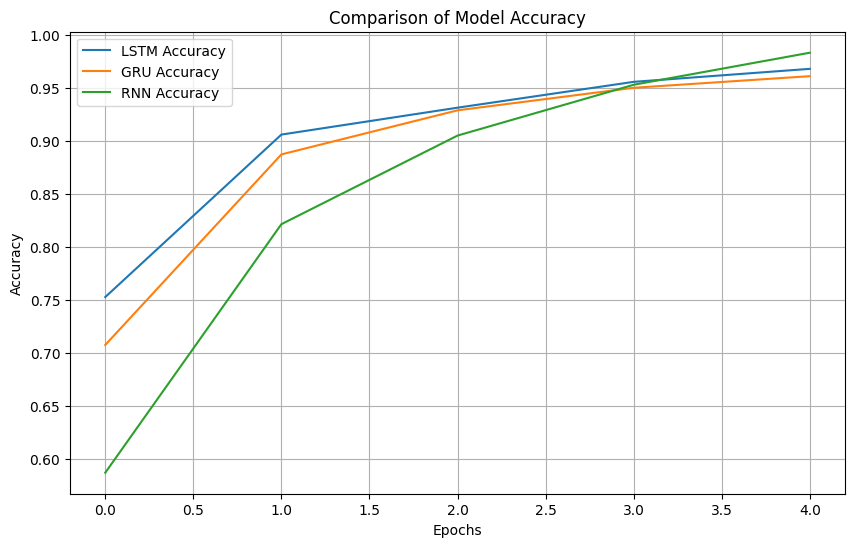

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

# Load the IMDb dataset
max_features = 10000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Create models
def create_model(model_type):
    model = Sequential()
    model.add(Embedding(max_features, 32, input_length=max_len))
    if model_type == 'LSTM':
        model.add(LSTM(32))
    elif model_type == 'GRU':
        model.add(GRU(32))
    elif model_type == 'RNN':
        model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train models and collect history
model_types = ['LSTM', 'GRU', 'RNN']
histories = []

plt.figure(figsize=(10, 6))

for model_type in model_types:
    model = create_model(model_type)
    history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)
    plt.plot(history.history['accuracy'], label=f'{model_type} Accuracy')

plt.title('Comparison of Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.savefig("plot.png")
plt.show()